In [1]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
spotify=pd.read_csv("Spotify-2000.csv", thousands=",")
spotify.drop('Index',axis=1, inplace=True)


In [3]:
pd.crosstab(spotify['Top Genre'], spotify['Year']).idxmax()

Year
1956    adult standards
1958    adult standards
1959    adult standards
1960    adult standards
1961    adult standards
             ...       
2015        dutch indie
2016       british soul
2017                pop
2018          dutch pop
2019         album rock
Length: 63, dtype: object

## HeatMap

Some key correlations to note: (Loudness, Energy), (Valence, Danceability), (Loudness, Year), (Valence, Energy), (Energy, Acousticness), (Loudness Acousticness)

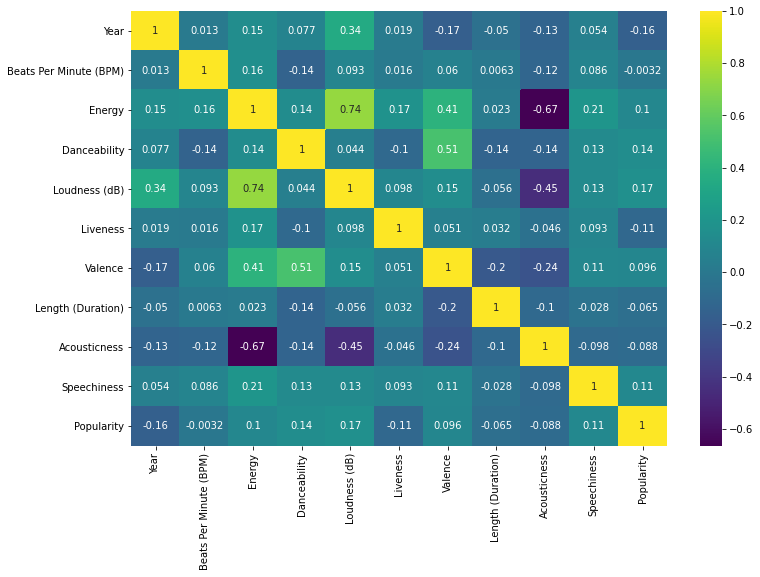

In [139]:
plt.figure(figsize=(12,8))
sns.heatmap(spotify.corr(), cmap="viridis", annot=True )

In [140]:
popularity_rank = spotify['Popularity'].rank(ascending=True)


In [141]:
popularity_percentile = pd.qcut(popularity_rank,
                                4,
                                labels=['low', 'medium', 'high',
                                        "insanely good"])

In [142]:
spotify['Percentile'] = popularity_percentile
spotify

Title                    Artist            Top Genre  \
0                    Sunrise               Norah Jones      adult standards   
1                Black Night               Deep Purple           album rock   
2             Clint Eastwood                  Gorillaz  alternative hip hop   
3              The Pretender              Foo Fighters    alternative metal   
4     Waitin' On A Sunny Day         Bruce Springsteen         classic rock   
...                      ...                       ...                  ...   
1989        Heartbreak Hotel             Elvis Presley      adult standards   
1990               Hound Dog             Elvis Presley      adult standards   
1991         Johnny B. Goode               Chuck Berry           blues rock   
1992               Take Five  The Dave Brubeck Quartet                bebop   
1993          Blueberry Hill               Fats Domino      adult standards   

      Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0     2004                     157      30            53            -14   
1     2000                     135      79            50            -11   
2     2001                     168      69            66             -9   
3     2007                     173      96            43             -4   
4     2002                     106      82            58             -5   
...    ...                     ...     ...           ...            ...   
1989  1958                      94      21            70            -12   
1990  1958                     175      76            36             -8   
1991  1959                     168      80            53             -9   
1992  1959                     174      26            45            -13   
1993  1959                     133      50            49            -10   

      Liveness  Valence  Length (Duration)  Acousticness  Speechiness  \
0           11       68                201            94            3   
1           17       81                207            17            7   
2            7       52                341             2           17   
3            3       37                269             0            4   
4           10       87                256             1            3   
...        ...      ...                ...           ...          ...   
1989        11       72                128            84            7   
1990        76       95                136            73            6   
1991        31       97                162            74            7   
1992         7       60                324            54            4   
1993        16       83                148            74            3   

      Popularity     Percentile  
0             71           high  
1             39            low  
2             69           high  
3             76  insanely good  
4             59         medium  
...          ...            ...  
1989          63           high  
1990          69           high  
1991          74  insanely good  
1992          65           high  
1993          56         medium  

[1994 rows x 15 columns]

In [143]:
spotify_top=spotify[spotify['Percentile']=='insanely good']

We expect to see Coldplay, The Beatles, Ed Sheeran make the most top songs

Text(0.5, 1.0, 'Top artists')

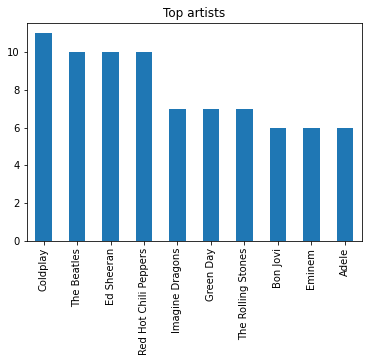

In [144]:
spotify_top["Artist"].value_counts()[:10].plot(kind="bar")
plt.title("Top artists")

Of the top artists, we expect to see Imagine Dragons, Ed Sheeran and Cold play to make song with the highest popularity

Text(0.5, 1.0, 'Top artists based on Popularity')

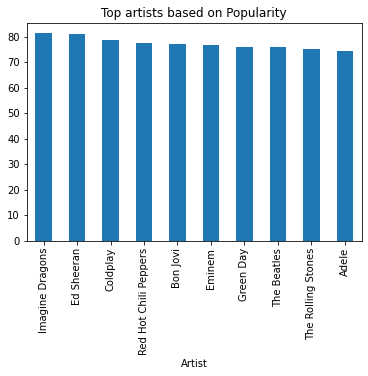

In [145]:
spotify_top2=spotify_top.groupby(['Artist'])['Popularity'].agg(["mean", "count"]).sort_values(by='count', ascending=False)
spotify_top2['mean'][:10].sort_values(ascending=False).plot(kind='bar')
plt.title("Top artists based on Popularity")

In [164]:
train_features, test_features, train_labels, test_labels = train_test_split(spotify.drop(['Title', 'Artist', 'Top Genre','Year', 'Popularity','Percentile'], axis=1), spotify['Popularity'], test_size = 0.2, random_state = 42)

In [166]:
rmse_dict={}
for i in range (2,11):
    model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=i)
    model.fit(train_features, train_labels)
    pred = model.predict(test_features)
    predtrain= model.predict(train_features)
    print('RMSE: '+str(i), np.sqrt(metrics.mean_squared_error(test_labels, pred)))
    print('RMSE Train:'+str(i), np.sqrt(metrics.mean_squared_error(train_labels, predtrain)))
    print("\n")
    

RMSE: 2 14.325110244308105
RMSE Train:2 13.752425873804178


RMSE: 3 14.293598367759165
RMSE Train:3 13.517512854507764


RMSE: 4 14.284630704993477
RMSE Train:4 13.245906331704429


RMSE: 5 14.275767292918749
RMSE Train:5 12.905933136541144


RMSE: 6 14.26972154585371
RMSE Train:6 12.48500569649039


RMSE: 7 14.261836456926385
RMSE Train:7 11.980300584228804


RMSE: 8 14.255651251580806
RMSE Train:8 11.392992440230696


RMSE: 9 14.2669931262241
RMSE Train:9 10.746915772420905


RMSE: 10 14.277587354506004
RMSE Train:10 10.053710475005103




In [167]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=3)
model.fit(train_features, train_labels)
pred = model.predict(test_features)

In [168]:
pred[:10]

array([58.31998147, 59.293344  , 67.15057776, 59.39171478, 58.25863989,
       59.98845752, 58.90117545, 59.17528253, 59.81806468, 58.11091462])

In [169]:
test_labels[:10]

889     58
1672    60
414     40
1599    57
849     72
1658    70
926     62
1670    73
1448    45
1216    52
Name: Popularity, dtype: int64

Loudness, Liveness and Dancebility the most important varaibles

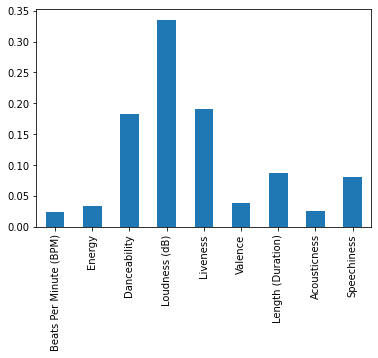

In [178]:
importance = model.feature_importances_
impor_ser=pd.Series(importance)
impor_ser.index = train_features.columns
impor_ser.plot(kind="bar")